In [33]:
# Imports

import timeit
import random
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## Implementation of Linked Lists

In [34]:
class Node:

    def __init__(self, val, next= None):
        self.val = val
        self.next = next

class LinkedList:

    def __init__(self, head= None):
        self.head = head

    def addNode(self, val):
        tempNode = Node(val)
        if self.head is None:
            self.head = tempNode
            return

        start = self.head
        while True:
            if start.next is None:
                start.next = tempNode
                break
            start = start.next

## Binary Search on Linked Lists

In [35]:
def binarySearchLinked(searchList, val):
    '''
    Required:
    head pointer that points to head of linked list
    val integer to be found

    Promises:
    Finds and returns the Node that has the val else returns None
    '''
    start = searchList.head
    last = None
    
    while True:                         # O(log n)
        mid = middle(start, last)       # O(n)

        if mid is None:                 # O(1)
            return None

        if mid.val == val:            # O(1)
            return mid

        elif mid.val < val:             # O(1)
            start = mid.next

        elif mid.val > val:             # O(1)
            last = mid

        if start == last:               # O(1)
        # and last is not None:
            break

    return None

def middle(start, last):
    '''
    Required:
    start pointer that points to the first element
    last pointer that points to the last element

    Promises:
    Finds and returns the middle Node of the linked list

    How it works:
    Two pointers, slow and fast, will traverse the whole array. Fast increments by two steps
    each time. When fast reaches the last element slow would have reached the middle element.
    '''

    if start is None:
        return None

    slow = start
    fast = start

    while fast.next != last and fast.next.next != last:
        fast = fast.next.next
        slow = slow.next

    return slow

In [36]:
testList = LinkedList()
testList.addNode(2)
testList.addNode(5)
testList.addNode(7)
testList.addNode(11)
testList.addNode(15)
testList.addNode(18)

value = 155

node = binarySearchLinked(testList, value)

if node is None:
    print("Element not Found\n")
else:
    print("Element Found")
    print(node.val)

Element not Found



## Implementation of Array Class

In [37]:
class Array:
    def __init__(self, size):
        self.size = size
        self.data = [None] * size

    def getValue(self, index):
        if index < 0 or index >= self.size:
            raise IndexError("Index out of range")
        return self.data[index]

    def setValue(self, index, value):
        if index < 0 or index >= self.size:
            raise IndexError("Index out of range")
        self.data[index] = value

    def length(self):
        return self.size

    def print(self):
        print(self.data)

In [38]:
array = Array(10)
array.print()

[None, None, None, None, None, None, None, None, None, None]


## Binary Search in Array Class

In [39]:
def binarySearchArray(arr, value):

    low = 0
    high = arr.length() - 1

    while low <= high:                  # O(log n)

        mid = (low + high) // 2         # O(1)

        if arr.getValue(mid) == value:  # O(1)
            return mid

        elif arr.getValue(mid) < value: # O(1)
            low = mid + 1

        else:
            high = mid - 1              # O(1)

    return None

In [40]:
first = Array(5)
first.setValue(0, 1)
first.setValue(1, 2)
first.setValue(2, 3)
first.print()

[1, 2, 3, None, None]


In [41]:
binarySearchArray(first, 1)

0

## Q3

The complexity of binary search on linked lists is $O(log n)$. Basically, in the worst case, the fast pointer is traversing the entire array, even though it skips every other node. The actual complexity is something like $O(n/2)$ but since we don't care about the $1/2$, we write $O(n)$

Then the `while` loop repeats $O(log n)$ times since half the array is dicarded. When we multiply the two complexities, we get $O(nlog n)$

## Measuring Binary Linked List Performance

In [42]:
# Allocating array sizes

# sizes = [1000, 2000, 4000, 8000]
sizes = [i*2 for i in range(1, 100)]

In [43]:
bsl_times = []

def measureList(size):

    listy = LinkedList()

    for i in range(size):
        listy.addNode(i)
    
    avg_time = timeit.timeit(stmt= lambda: binarySearchLinked(listy, random.randint(1, size + 1)), number= 100) / 100
    return avg_time

for size in sizes:
    bsl_times.append(measureList(size))
    

In [44]:
bsl_times

[5.4629999794997275e-06,
 9.359999967273325e-07,
 8.349999552592635e-07,
 9.73999995039776e-07,
 1.0550000297371298e-06,
 1.1029999586753547e-06,
 1.3289999333210288e-06,
 1.706000039121136e-06,
 1.4859999646432698e-06]

In [45]:
bsa_times = []

def measureArray(size):

    array = Array(size)
    for i in range(size):
        array.setValue(i, i + 1)
    
    avg_time = timeit.timeit(stmt= lambda: binarySearchArray(array, random.randint(1, size + 1)), number= 100) / 100
    return avg_time

for size in sizes:
    bsa_times.append(measureArray(size))
    

In [46]:
bsa_times

[1.2700000661425293e-06,
 1.3699999544769525e-06,
 1.0269999620504676e-06,
 1.0999999358318746e-06,
 1.4940000255592167e-06,
 1.4519999967887997e-06,
 1.6029999824240805e-06,
 1.7649999062996357e-06,
 1.8889999773819e-06]

## Curve Fitting

In [47]:
def lognModel(x, a, b):
    return a * (np.log(x)) + b

def nlognModel(x, a, b):
    return a * (x * np.log(x)) + b

p_lin, _ = curve_fit(nlognModel, sizes, bsl_times)
p_arr, _ = curve_fit(lognModel, sizes, bsa_times)

## Plotting

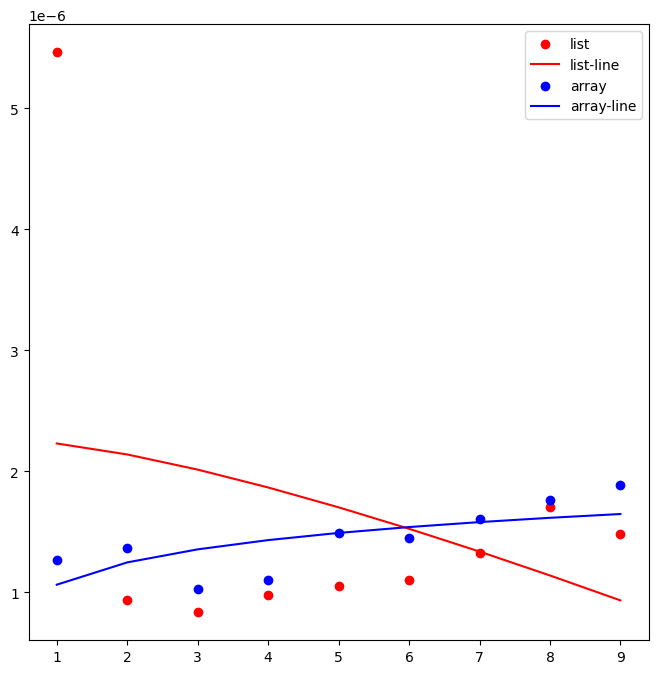

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

# linked list
ax.scatter(sizes, bsl_times, label='list', color='red')
ax.plot(sizes, nlognModel(np.array(sizes), *p_lin), label='list-line', color='red')

# array
ax.scatter(sizes, bsa_times, label='array', color='blue')
ax.plot(sizes, lognModel(np.array(sizes), *p_arr), label='array-line', color='blue')

ax.legend()

plt.tight_layout
plt.show()